<a href="https://colab.research.google.com/github/bryansb/simulacion/blob/main/Unidad1/Tarea5_SarmientoBryan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 5 - Generadores de números Pseudoaleatorios y Chi-Cuadrado
---

### **Nombre:** Bryan Sarmiento Basurto.
### **Asignatura:** Simulación

Calcular, graficar y obtener el valor de Chi-Cuadrado para los siguientes generadores, con las siguientes semillas:

* **Cuadrados medios:** Xo = 74731897457, n = 7.
* **Congruencia lineal:** Xo = 7, a = 74731897457, b = 37747318974, m = 19.
* **Tausworthe:** q = 7, r = 3, l = 5.
* **Random de Python:** seed = 11052022.

### Librerías

In [2]:
# Imports
import random
import matplotlib.pyplot as plt
import numpy as np

## Chi-Cuadrado

### Funciones

In [69]:
# Función principal
def chi_calculation(numbers, label='', log=False):
    table = {}

    # Genera la tabla para calcular Chi-Cuadrado
    for i in np.arange(0.1, 1.1, 0.1):
        for j in numbers:
            if j > i-0.1 and j <= i:
                table[round(i-0.1,1)] = table[round(i-0.1,1)]+1 if round(i-0.1,1) in table else 1

    N = len(numbers)
    n = np.sqrt(N)
    E = N/n

    chi = chi_summatory(table, E)
    chi_graph_table(table, label)  

    if(log):
        print(f'\nEl valor de Chi-Cuadrado es {chi}')  

    return chi

# Obtiene el valor de Chi-Cuadrado en base a la sumatoria
# de los valores de la tabla.
def chi_summatory(table, E):
    return sum([(value-E)**2/E for value in table.values()])

# Grafica las frecuencias de los valores de la tabla
def chi_graph_table(table, label):
    plt.figure(dpi=150)
    plt.bar(range(len(table)), list(table.values()), tick_label=list(table.keys()))
    plt.title('Valores de la tabla de Chi-Cuadrado: '+label)
    plt.xlabel('Rangos')
    plt.ylabel('Frecuencia')
    plt.show()

## Generador: Cuadrados Medios

### Funciones

In [13]:
# Función principal
def middle_square_generator(Xo=8370, n=4, iter=10, log=False):

    # Se comprueba que la condición de "n"
    if (n<=3):
        print('El valor de "n" debe ser mayor a 3')
        return -1

    Xn = Xo
    numbers = []

    for i in range(iter):
        Xnn = Xn**2
        Txnn = str(Xnn).zfill(8)
        size = len(Txnn)
        Ui = int(Txnn[int(size/2-n/2):int(size/2+n/2)])
        Rn = Ui / (int('9'*n)+1)
        numbers.append(Rn)

        if(log):
            print(str(i) + "\t" + str(Xn) + "\t"+ str(Ui)+"\t"+str(Rn))

        Xn = Ui
        
    return numbers

### Comprobación

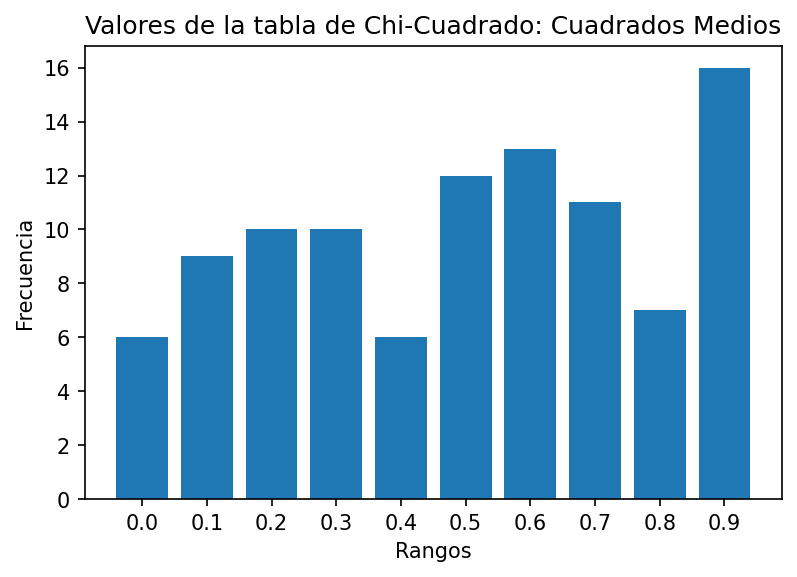


El valor de Chi-Cuadrado es 9.200000000000001


In [70]:
middle_square = middle_square_generator(Xo = 74731897457, 
                                        n = 7, 
                                        iter = 100)

chi_middle_square = chi_calculation(middle_square, 
                                    label='Cuadrados Medios', 
                                    log=True)

## Generador: Congruencia Lineal

### Funciones

In [75]:
# Función principal
def linear_congruential_generator(Xo=4370, a=3, b=5, m=19, iter=10, log=False):
    Xn = Xo
    numbers = []

    for i in range(iter):
        Xnn = (a*Xn+b) % m
        Ui = Xnn/m
        numbers.append(Ui)

        if (log):
            print(str(i) + "\t"+ str(Xnn)+"\t"+str(Ui))

        Xn = Xnn
    
    return numbers

### Comprobaciones

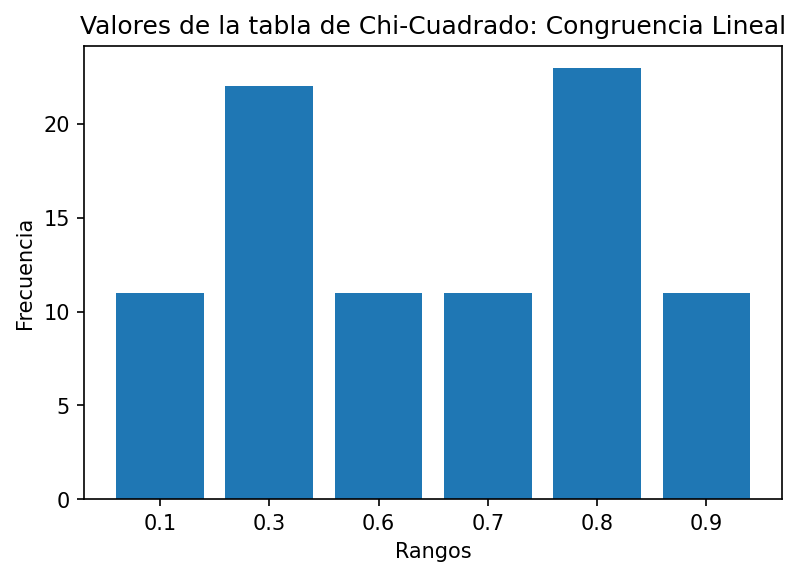


El valor de Chi-Cuadrado es 31.7


In [72]:
linear_congruential = linear_congruential_generator(Xo = 7, 
                                                    a = 74731897457, 
                                                    b = 37747318974, 
                                                    m = 19, 
                                                    iter = 100)

chi_linear_congruential = chi_calculation(linear_congruential,
                                          label='Congruencia Lineal', 
                                          log=True)

## Generador: Tausworthe



### Funciones

In [76]:
# Función principal, genera la secuencia de binarios
# period: Determina si genera la secuencia binaria en base al periodo, 
#         o en base a una cantidad determinada de números
def tausworthe_generator(seed=[1, 1, 1, 1, 1], r=3, q=5, l=4, n=10, period=True):
    binary_sequence = seed
    start = q

    if (period):
        end = (2**q)

    if (not period):
        end = n*l

    for i in range(start, end):
        bir = i-r
        biq = i-q
        bi = binary_sequence[bir] ^ binary_sequence[biq] # XOR
        binary_sequence.append(bi)

    numbers = get_decimal_numbers(binary_sequence, l, log=False)

    return numbers

# Convierte un vector con 0s y 1s a un string
# y posteriormente retorna el número decimal correspondiente
def bin_to_dec(vec):
    bin = ''
    
    for i in vec:
        bin = bin + str(i)

    return int(bin, 2)

# Convierte la secuencia binaria
# en números pseudoaleatorios
def get_decimal_numbers(seq, l, log=False):
    seq_dec = []
    e = l
    end = len(seq)
    const = 2**l

    for i in range(0, end, l):
        s = i
        dec = bin_to_dec(seq[s:e])
        num = dec/(const)
        seq_dec.append(num)

        if log:
            print(f'Binario: {seq[s:e]} = \
                    Decimal: {dec} | {dec} / {const} = {num} ')
            
        e = e + l

    return seq_dec

### Comprobación

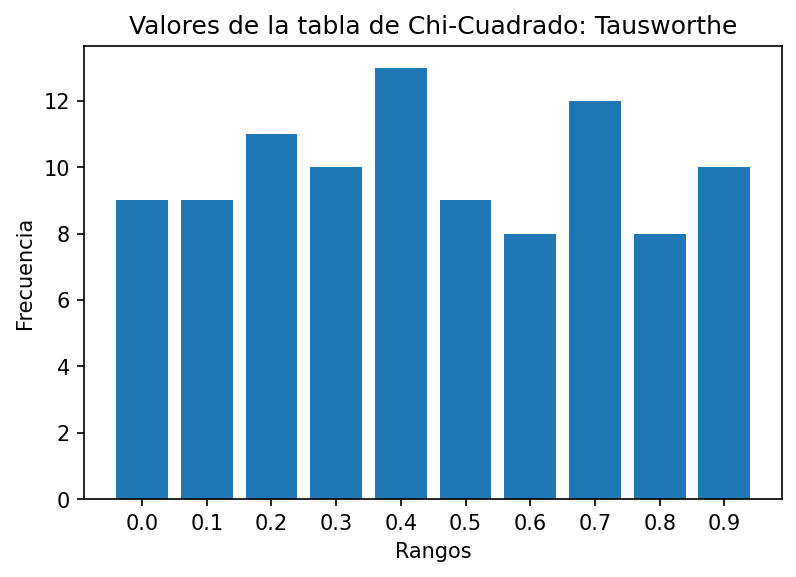


El valor de Chi-Cuadrado es 2.5


In [77]:
tausworthe = tausworthe_generator(seed = [1, 1, 1, 1, 1, 1, 1], 
                                  r = 3, 
                                  q = 7, 
                                  l = 5, 
                                  n = 100, 
                                  period=False)

chi_tausworthe = chi_calculation(tausworthe, 
                                 label='Tausworthe', 
                                 log=True)

## Generador: Random de Python

### Funciones

In [80]:
# Función principal
def python_generator(N=100):
    numbers = []
    random.seed(11052022)
    [numbers.append(random.random())for i in range(N)]
    return numbers

### Comprobación

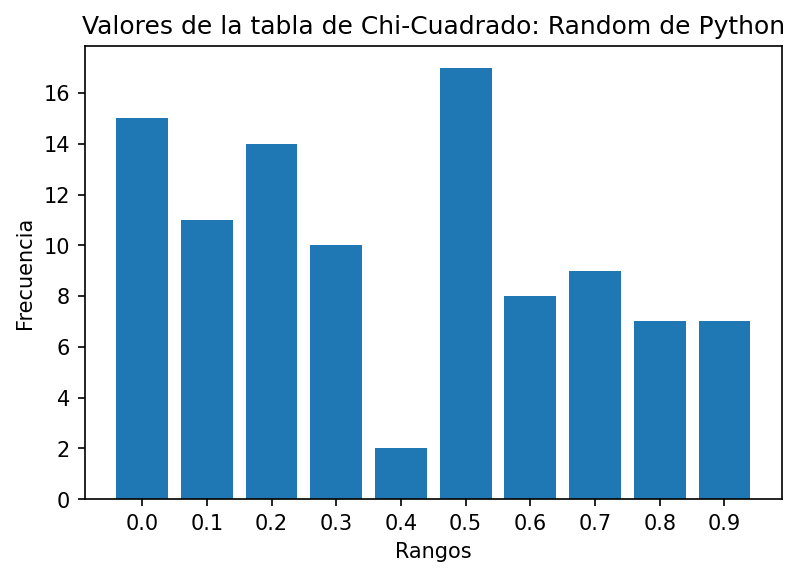


El valor de Chi-Cuadrado es 17.8


In [79]:
python = python_generator()
chi_python = chi_calculation(python,
                             label='Random de Python', 
                             log=True)